# <font color='Red'>Project Title : ***Diamonds Price Prediction*** </font>

# <font color='Blue'> Description</font>


The "Diamonds Price Prediction" project leverages the power of machine learning to accurately forecast the prices of diamonds. With the diamond market being highly dynamic and influenced by various factors, this project aims to provide reliable predictions to assist buyers, sellers, and investors in making informed decisions.

The project involves several key steps. Firstly, the dataset is preprocessed to handle missing values, outliers, and categorical variables, ensuring the data is in a suitable format for training the machine learning model. Feature engineering techniques may also be employed to extract additional relevant information and enhance the predictive capabilities of the model.
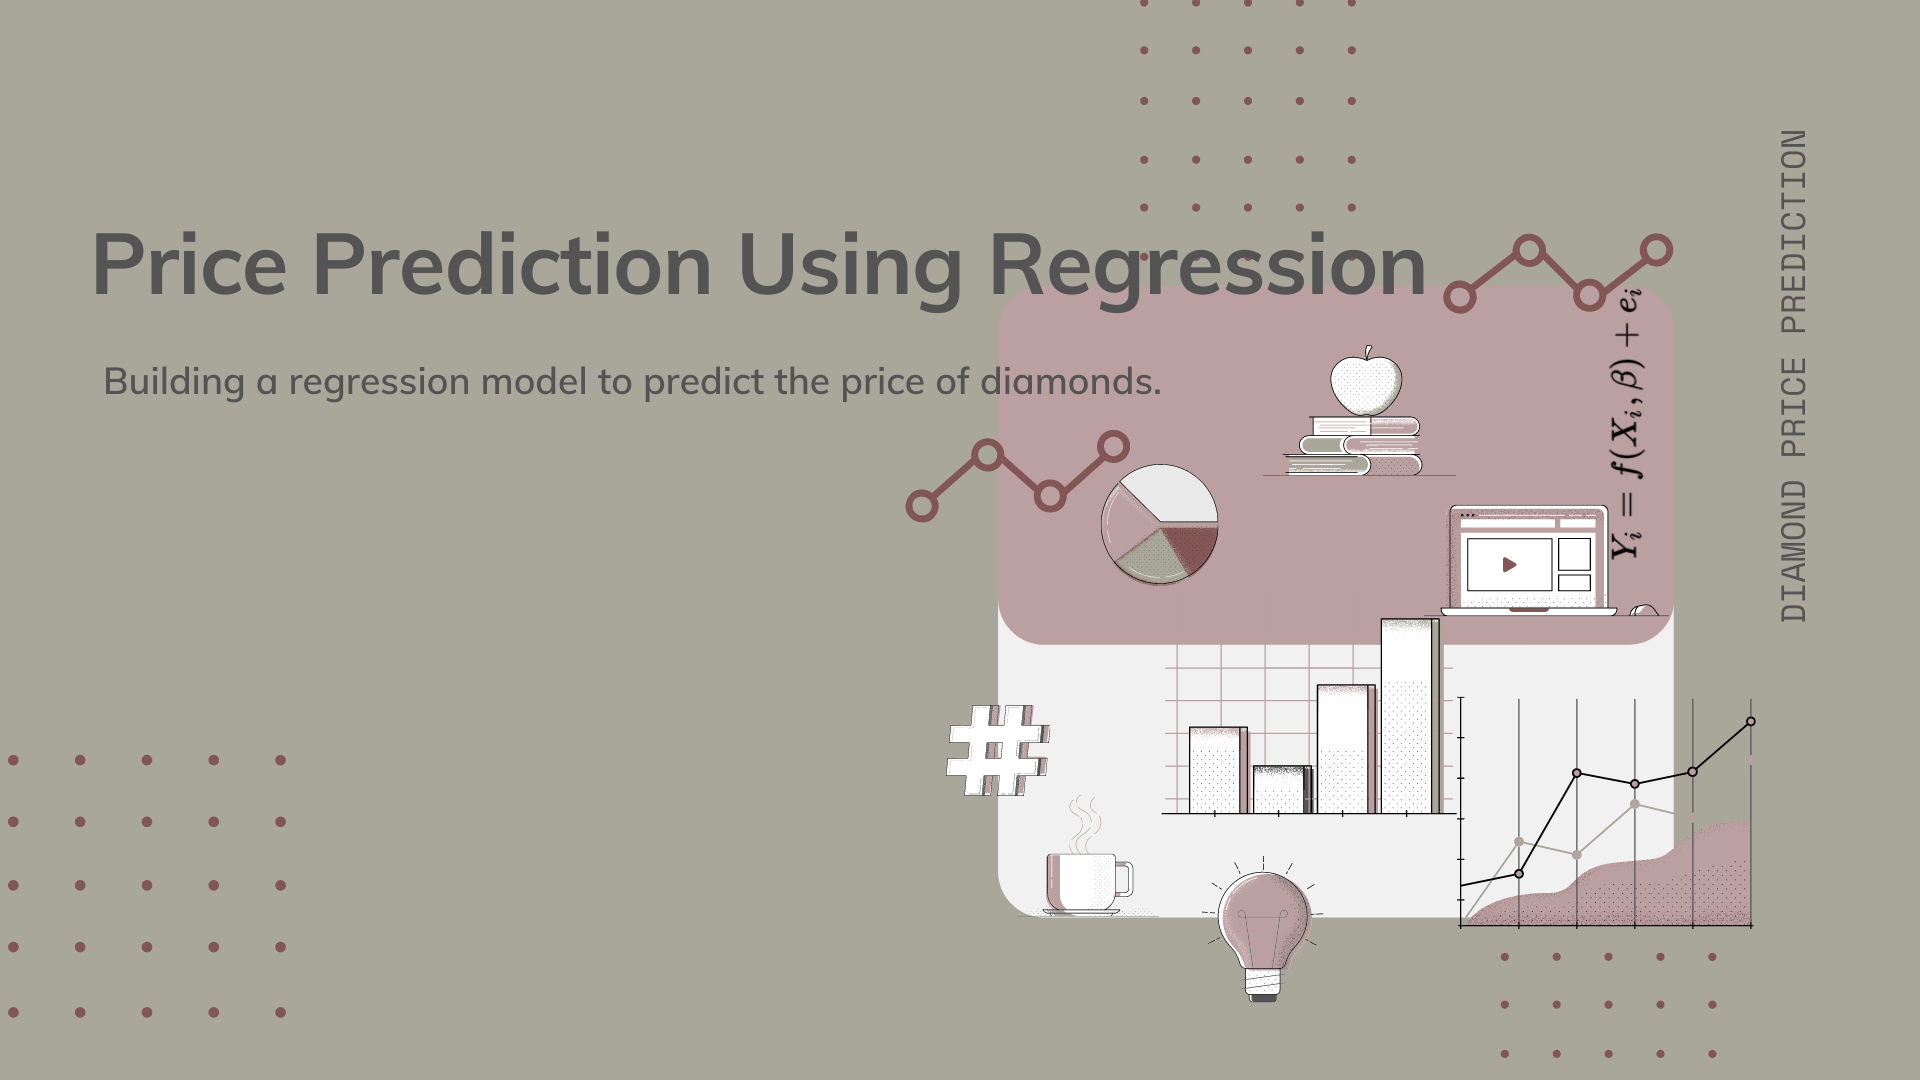


## <font color ='Green'>1) Loading Libraries</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


ModuleNotFoundError: No module named 'ydata_profiling'

In [17]:
df = pd.read_csv('diamonds.csv')


In [18]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [19]:
df.shape  # dataset has 53940 rows and 10 columns

(53940, 10)

**Observation:**
<font color='Red'>1) We have Total 53940 number of Rows and 10 Columns in the Dataset.</font>

## Data Preprocessing

<font color='orange'>**Data Preprocessing have some steps involved:**</font>

1)Data cleaning

2)Identifying and removing outliers

3)Encoding categorical variables **

In [20]:
df.info()
# Display information about the DataFrame, including column names, data types, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### <font color='purple'> Checking Null Values</font>

In [21]:
#Checking for the null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


**Observation:*** 
we don't have any null values present in our Dataset.

## Missingno

The missingno library is used to visualize missing (null or NaN) values in a DataFrame. It provides a clear and concise way to understand the distribution and patterns of missing data in your dataset.



In [22]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

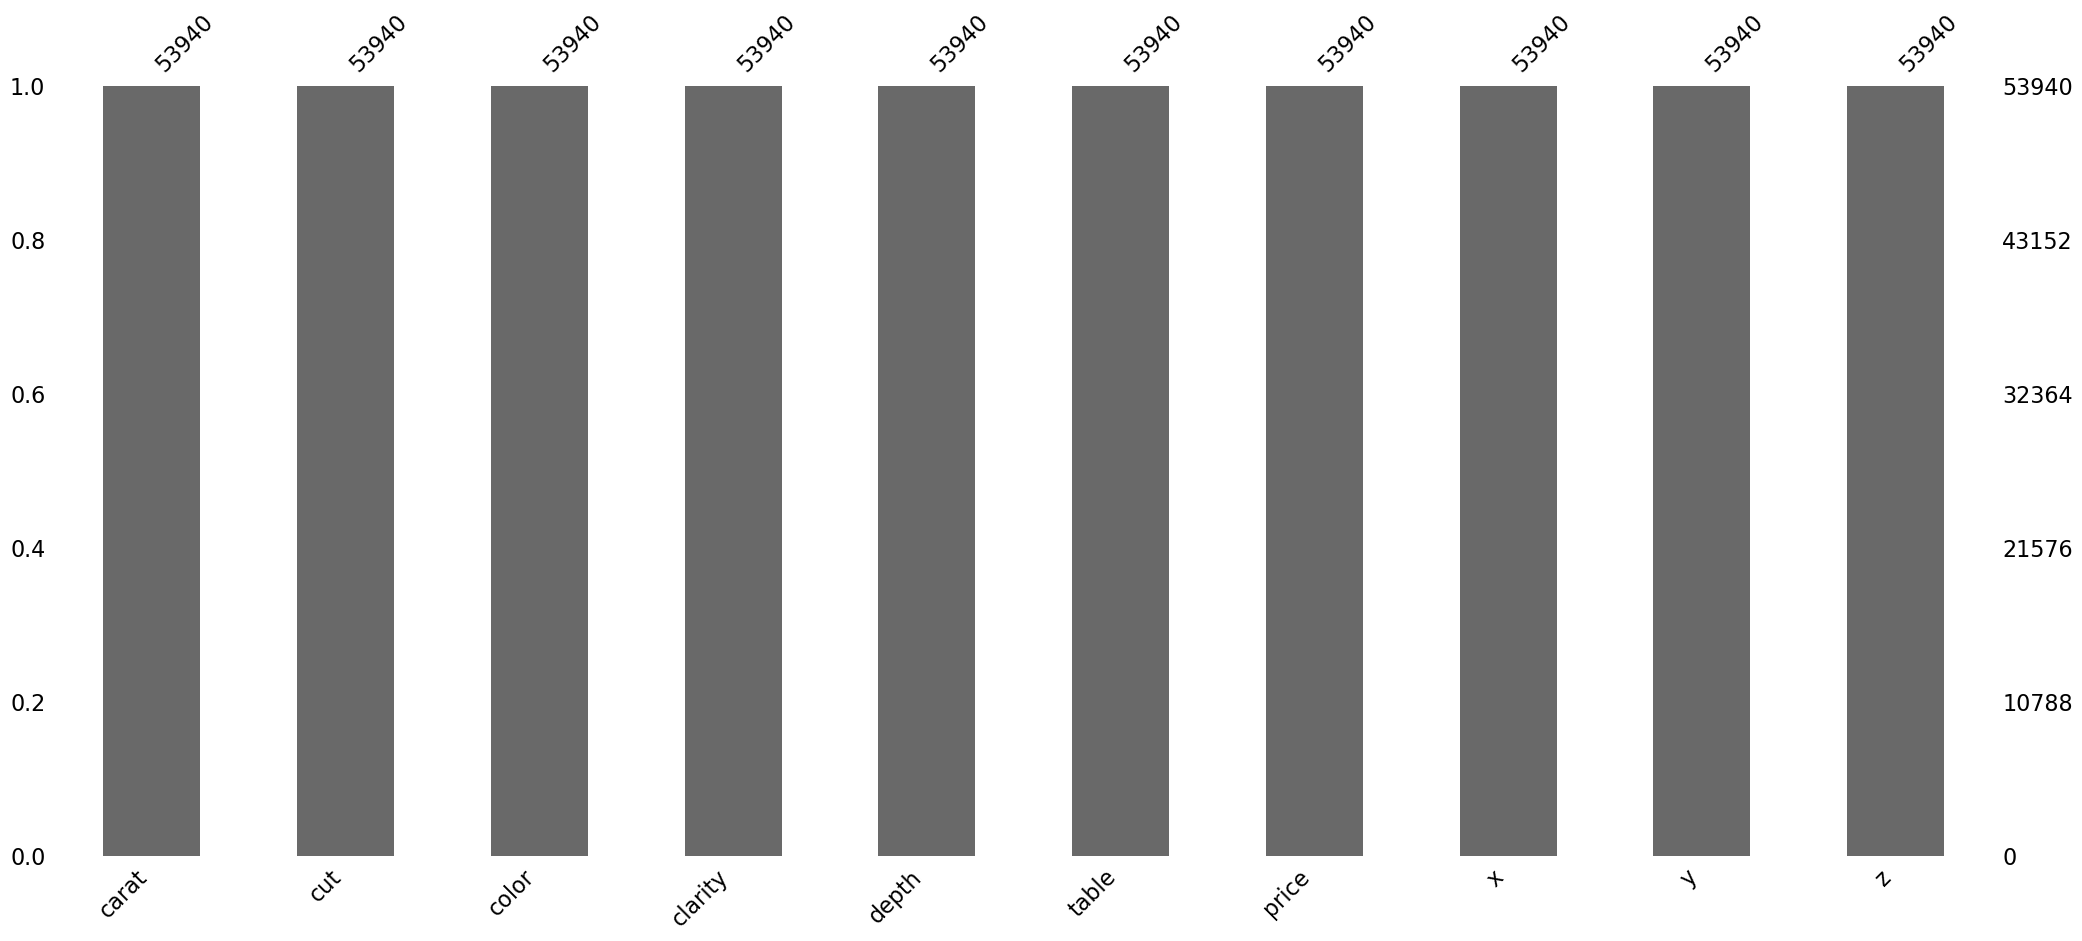

In [25]:
import missingno as msno 
msno.bar(df)


**observation:**
Not Any missing values are present in any Features..

In [26]:
df['carat'].unique()

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

In [27]:
#Checking for unique values in cut column
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [28]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [29]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [30]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


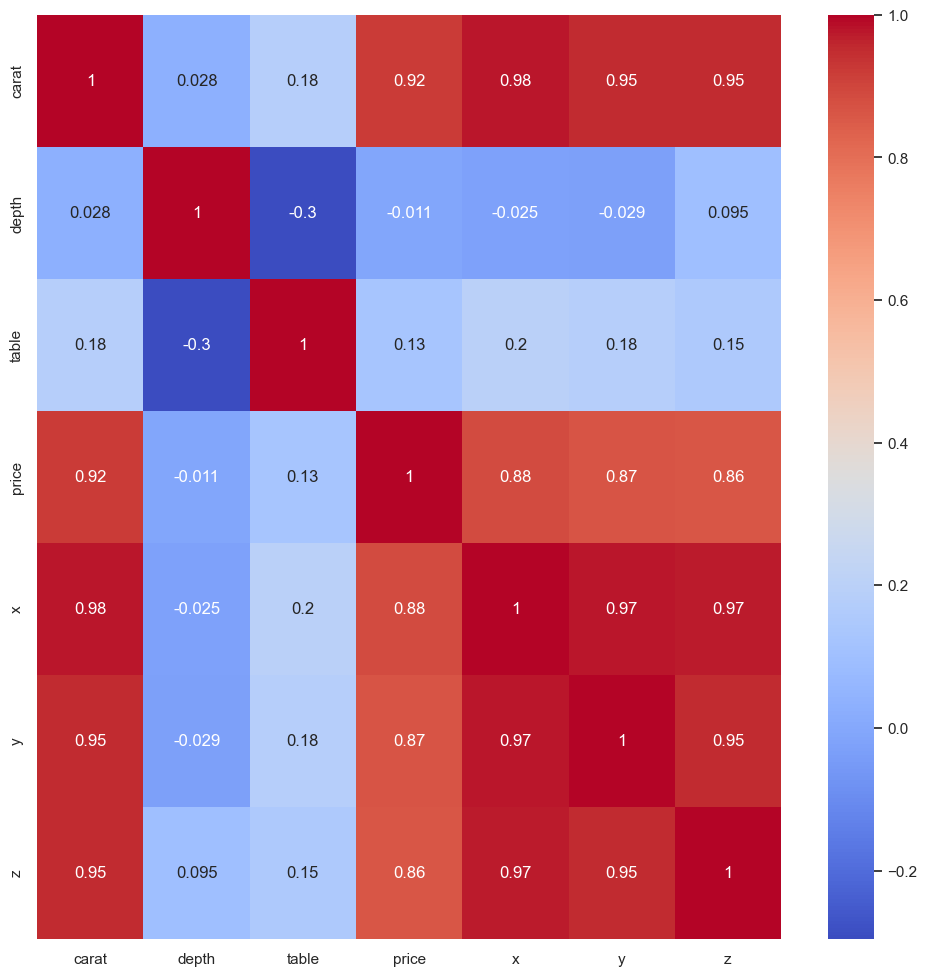

In [33]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

sns.set(style="whitegrid")

# Set the figure size before creating the heatmap
plt.figure(figsize=(12, 12))

# Create the heatmap for numeric columns
heatmap = sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')

# Display the plot
plt.show()


<font color='brown'>**Observation:**</font>
1) "x", "y" and "z" show a high correlation to the target column.

2) "depth" and "table" show low correlation.

# <font color='Dark Blue'> Comparing 'cut' and 'price' features by using Bar Graph</font>

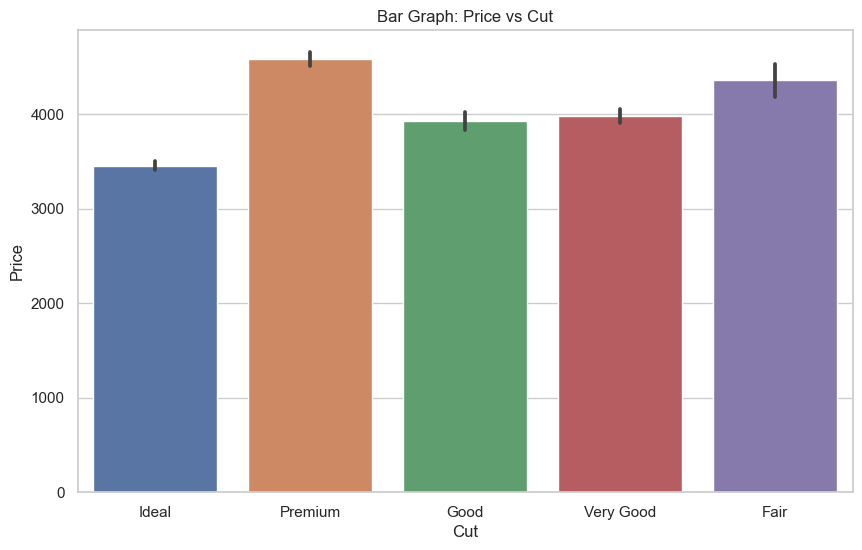

In [34]:


sns.set(style="whitegrid")

# Trim whitespaces from 'cut' column
df['cut'] = df['cut'].str.strip()

# Create a bar plot for 'cut' and 'price'
plt.figure(figsize=(10, 6))
sns.barplot(x='cut', y='price', data=df, order=df['cut'].unique())

# Add labels and title
plt.xlabel('Cut')
plt.ylabel('Price')
plt.title('Bar Graph: Price vs Cut')

# Show the plot
plt.show()



### <font color='Gray'> Observation:</font>

<font color='Chocolate'>1)Premium Cut have High Prices than Other cuts</font>  
 <font color='Dark Blue'>2) Ideal have low price than other cuts</font> 

# <font color='Dark orange'> Comparing 'Carat' and 'price' features by using  scatterplot</font>

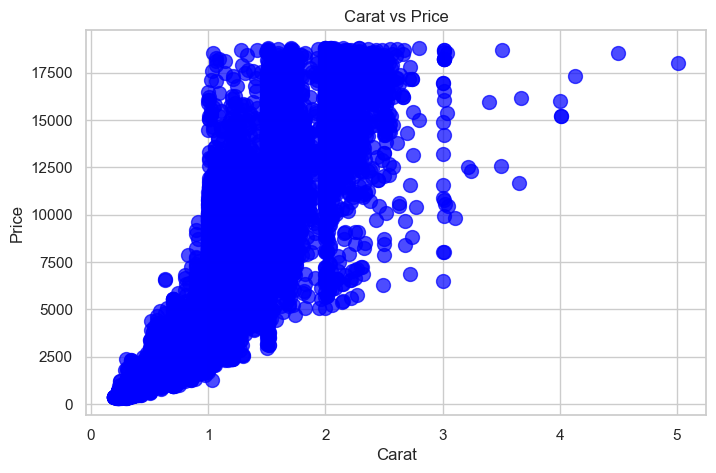

In [35]:


# Creating a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x='carat', y='price', data=df, s=100, color='blue', alpha=0.7)

# Adding labels and title
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')

# Show the plot
plt.show()

### <font color='Red'>**Observation:**</font>
<font color ='Blue'>1) Prices is increasing for higher carats..

## <font color= 'Red' > Price VS Clarity by using pie chart</font>

Text(0.5, 1.0, 'Clarity vs Prices')

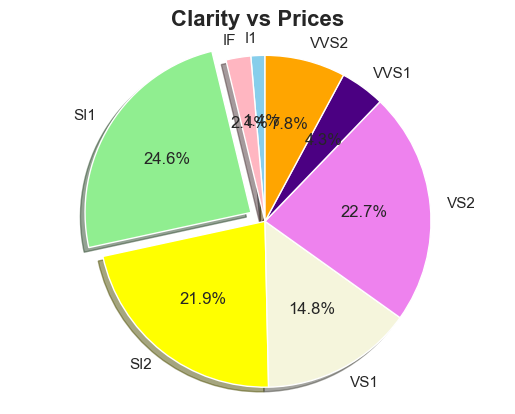

In [36]:
# Calculate the total charges for each clarity
prices_by_clarity = df.groupby('clarity')['price'].sum()

explode = [0, 0, 0.1, 0,0,0,0,0]

#Set the colors
colors = ['skyblue', 'lightpink', 'lightgreen', 'yellow','beige','violet','indigo','orange']

# Create the pie chart
plt.pie(prices_by_clarity, labels=prices_by_clarity.index, autopct='%2.1f%%',colors=colors,explode=explode, shadow=True, startangle=90)

# Set aspect ratio to be equal to make the pie circular
plt.axis('equal')

#title
plt.title('Clarity vs Prices', fontsize=16, fontweight='bold')

## **Observation:**

1) Higher Proportion of Prices are contributed by the Sl1 clarity Level.  
2) Lower Proportion of Prices are contributed by the l1 clarity Level. 

# <font color='Red'>scatter graph</font>

Text(0, 0.5, 'Price')

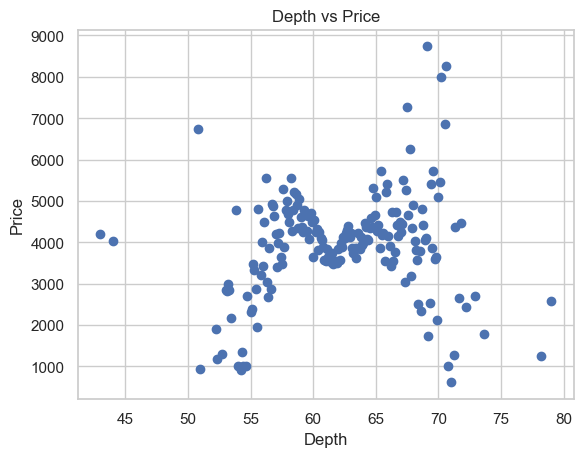

In [37]:
## Grouping the data by depth and calculating the mean of Prices
grouped_data = df.groupby('depth')['price'].mean().reset_index()

# Creating the scatter plot
plt.scatter(grouped_data['depth'], grouped_data['price'])
plt.title('Depth vs Price')
plt.xlabel('Depth')
plt.ylabel('Price')

## **Observation:**

1) Highest Price is Noted when the Depth is Between 65 to 70.  
2) more than 50% of Price lies between 3000 to 6000.  
3) 50% of the Diamond's Depth is in Between 60 to 70.



# <font color='Brown'>Converting Categorical variable into numeric values</font>

In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [39]:
Le = LabelEncoder()
Ohe = OneHotEncoder(sparse=False, drop='first')

# LabelEncoder

In [40]:
df['color'] = Le.fit_transform(df['color'])

In [41]:
df['clarity']=Le.fit_transform(df['clarity'])

In [42]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,4,3,61.0,58.0,2757,6.15,6.12,3.74


# <font color='Blue'> OneHotEncoder<font>

In [43]:
encoded_features = Ohe.fit_transform(df[['cut']])

C:\Users\91942\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [44]:
new_columns = Ohe.get_feature_names_out(['cut'])
print(new_columns)

['cut_Good' 'cut_Ideal' 'cut_Premium' 'cut_Very Good']


In [45]:
# Create a new DataFrame with the encoded features
df_encoded = pd.DataFrame(encoded_features, columns=new_columns) 

In [46]:
# Concatenate the original DataFrame and the encoded DataFrame
df = pd.concat([df,df_encoded],axis=1)

In [47]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,Ideal,1,3,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,0.0
1,0.21,Premium,1,2,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,0.0
2,0.23,Good,1,4,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,0.0,0.0
3,0.29,Premium,5,5,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,1.0,0.0
4,0.31,Good,6,3,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,0.0,0.0


In [48]:
#Checking the name of the total columns present in df
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good'],
      dtype='object')

# Heatmap

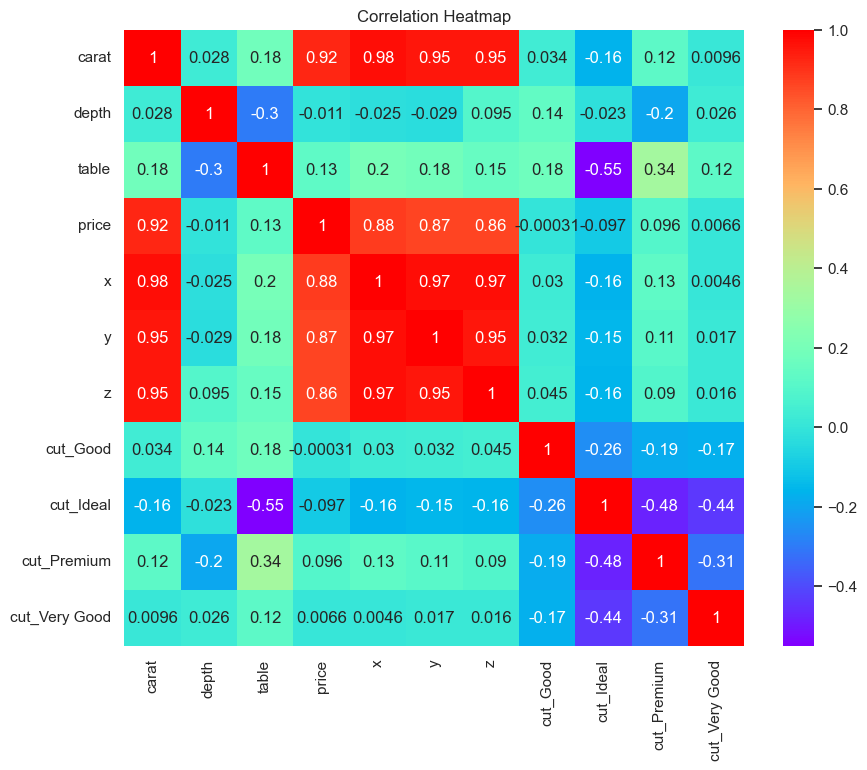

In [49]:
df.drop(columns='cut',axis=1,inplace=True)
# Compute the correlation matrix .
import pandas as pd



numeric_df = df.select_dtypes(include=['float64', 'int64'])


corr_matrix = numeric_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='rainbow')
plt.title('Correlation Heatmap')
plt.show()


# Creating the independent variable(X) and dependent variable(y)

In [50]:
# Extract features (X) and target variable (y)
x = df[['carat', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good']]
y = df[['price']]

In [51]:
# Convert X and y to numpy arrays
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [52]:
df.head()

,carat,color,clarity,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,1,3,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,0.0
1,0.21,1,2,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,0.0
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,0.0,0.0
3,0.29,5,5,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,1.0,0.0
4,0.31,6,3,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,0.0,0.0


In [53]:
x

array([[0.23],
       [1.  ],
       [3.  ],
       ...,
       [1.  ],
       [0.  ],
       [0.  ]])

In [54]:
y

array([[ 326],
       [ 326],
       [ 327],
       ...,
       [2757],
       [2757],
       [2757]], dtype=int64)

# Splitting the data set into train and test using train_test_split from sklearn.model_selection

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('carat',axis=1),df['carat'],test_size=0.2)
#Creating x_train,x_test,y_train and y_test we will set test_size = 0.2 so 20% of the actual data will be used as test data

In [57]:
df.head()

,carat,color,clarity,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,1,3,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,0.0
1,0.21,1,2,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,0.0
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,0.0,0.0
3,0.29,5,5,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,1.0,0.0
4,0.31,6,3,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,0.0,0.0


In [58]:
print('x_train_shape: ',x_train.shape)
print('y_train_shape: ',y_train.shape)
print('x_test_shape: ',x_test.shape)
print('y_test_shape: ',y_test.shape)

x_train_shape:  (43152, 12)
y_train_shape:  (43152,)
x_test_shape:  (10788, 12)
y_test_shape:  (10788,)


In [59]:
y_train = y_train.values.reshape(-1, 1)
y_test= y_test.values.reshape(-1, 1)

# RobustScaler 
1)To handle the outliers

In [60]:
from sklearn.preprocessing import RobustScaler

In [61]:
#Creating the object of Robust
Rb = RobustScaler()

In [62]:
x_train = Rb.fit_transform(x_train)


In [63]:
x_test = Rb.transform(x_test)

In [64]:
y_train = Rb.fit_transform(y_train)

In [65]:
y_test = Rb.transform(y_test)

## <font color= 'Brown'> Creating LinearRegression Model</font>

In [66]:
x_mean = x_train.mean(axis=0)

In [67]:
y_mean = y_train.mean(axis=0)

<font color ='sky Blue'> These lines calculate the mean values along axis 0 for the x_train and y_train arrays. This is done to center the data around the mean, which is a common step in linear regression.**</font>

In [68]:
num = 0 #Initialize variables.
dim = 0
epsilon = 1e-8  
for i in range(len(x_train)):
    num += (x_train[i] - x_mean) * (y_train[i] - y_mean)
    dim += (x_train[i] - x_mean) ** 2

coff = num/(dim + epsilon)#coff is the coefficient (slope) of the linear regression model.
inter = y_mean - (coff * x_mean)#inter is the intercept of the linear regression model.
print('Coff:', coff)
print('Intercept:', inter)

Coff: [ 0.3816918  -0.27455119  0.02194554  0.180961    0.74994577  1.17833972
  1.11051904  1.12077188  0.09408596 -0.24978366  0.19954475  0.01510829]
Intercept: [ 0.20548231  0.13836242  0.15422218  0.12609132 -0.10747862  0.13282447
  0.13765233  0.13455944  0.14489473  0.25399368  0.10283705  0.15005316]


**1)num is used to accumulate the numerator of the coefficient calculation.**  
**2)dim is used to accumulate the denominator of the coefficient calculation.**    
**3)epsilon is a small constant added to the denominator to avoid division by zero.**  

<font color='red'>This loop iterates through each data point in the training set and updates the values of num and dim for the coefficient calculation.</font>

**num is the sum of the product of the differences between each x and y and their respective means.**  
**dim is the sum of the squared differences between each x and its mean.**  

In [69]:
coff.shape

(12,)

In [70]:
m = coff
c = inter
y = m * 11 + c # y=Mx + c. x=11 input value here. This line calculates the predicted value of y
z = m * 95644.50 + c   #This line calculates the predicted value of z.
print('y:', y)
print('z:', z)

y: [ 4.40409211 -2.88170072  0.39562317  2.11666228  8.14192485 13.09456141
 12.35336182 12.46305012  1.17984025 -2.49362663  2.29782935  0.3162443 ]
z: [ 36506.92682192 -26259.17337436   2099.12488428  17308.05012843
  71728.08070611 112701.8463835  106215.17638753 107195.80071425
   8998.9492081  -23890.17974309  19085.46109555   1445.17446072]


In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [72]:
# Evaluate the model on the test set
y_pred = x_test.dot(coff)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):',mae)
print('Root Mean Squared Error (RMSE): ',rmse)

Mean Squared Error (MSE): 4.611720777433212
Mean Absolute Error (MAE): 1.8132151799066516
Root Mean Squared Error (RMSE):  2.1474917409464496


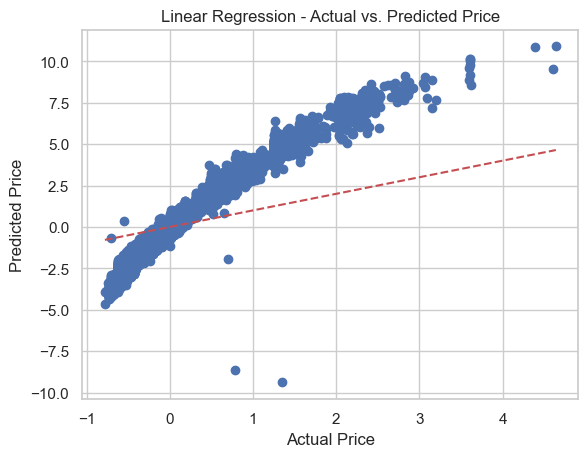

In [73]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression - Actual vs. Predicted Price')
plt.show()

#   LinearRegression Through Function

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
Lr = LinearRegression()

In [76]:
Lr.fit(x_train,y_train)

LinearRegression()

In [77]:
y_hat = Lr.predict(x_test) # y_hat is predicted values.

In [78]:
from sklearn.metrics import r2_score
r2_score(y_test,y_hat)

0.9727647708858959

## **Observation:**  
<font color='Red'>1)In this model, an R-squared score of approximately 0.96 means  model explains about 96.20% of the variance in the test data. </font>  
<font color='Red'>2)the model's predictions are  capturing a significant portion of the variability present in the actual data.</font>  

**A higher R-squared value (closer to 1) would indicate better explanatory power.**
    
    


## 1) Finding
MSE(mean_squared_error)  
MAE(mean_absolute_error)  
RMSE(root_mean_squared_error)

In [79]:
print(mean_squared_error(y_test,y_hat))
print(mean_absolute_error(y_test,y_hat))
print(np.sqrt(mean_squared_error(y_test,y_hat)))

0.01492045785550032
0.07456247401495195
0.1221493260542207


**The Lower value of MSE,MAE,RMSE is indicating Better Model's Performances.** 

<font color =' Green'>In conclusion, the "Diamonds Price Prediction" project utilizes machine learning to accurately forecast diamond prices. By analyzing a comprehensive dataset and employing advanced algorithms, the project empowers stakeholders with data-driven decision-making, enhancing transparency and efficiency in the diamond market. Real-time predictions enable informed transactions, benefiting buyers, sellers, and investors.</font>

<font color='Brown'>***Thank you...***</font>